> # **Métodos Computacionales I - Taller #2**

**Hecho por:** Claudia Cuellar Nieto & Thomas Andrade Hernández


In [ ]:
# Zona de librerías:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import sympy as sym
import pandas as pd
from tqdm import tqdm
from time import sleep
import os.path as path
import os
import wget

 > **Códigos recurrentes en la solución del taller:**
 
A continuación, antes de desarrollar el código de las actividades, presento el código enfocado a obtener raíces de polinomios usando el método de Newton-Rhapson. Esto con el fin de no repetir líneas de código de manera innecesaria.

In [2]:
def CDerivative(function, x, h =1e-4):
    return (function(x + h) - function(x - h))/(2*h)

def NewtonRhapson(function, dfunction, xn, itmax = 100, precision = 1e-5):
    error = 1
    it = 0
    while error > precision and it <= itmax:
        try:
            xn1 = xn - function(xn)/dfunction(function, xn)
            error = np.abs(function(xn)/dfunction(function, xn))
        
        except ZeroDivisionError:
            print('No es posible realizar la división entre cero.')
        it += 1
        xn = xn1
    if itmax == it:
        False
    else:
        return xn

def FindingRoots(function, x, dfunction = CDerivative, tolerance = 8):
    Roots = np.array([])
    for i in x:
        root = NewtonRhapson(function, dfunction, i)
        if root != False:
            root = np.round(root, tolerance)
            if root not in Roots:
                Roots = np.append(Roots, root)
    Roots.sort()
    return Roots

> **3. Derivación e Integración Numérica:**

**c)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada progresiva de orden $\mathcal{O}(h^2)$ en el intervalo $[0.1, 1.1]$ con $h = 0.01$.

In [3]:
h = 0.01
x = np.linspace(0.1, 1.1, 100)

def f(x):
    return np.sqrt(np.tan(x))

# Definimos el proceso general para el cálculo de la derivada progresiva:

def derivate_progresive(x):
    return (1/(2*h))*(-3*f(x) + 4*f(x + h) - f(x + (2*h))) 

#Estimaremos el valor de la derivada dado el promedio de los valores hallados:

progressive = (np.sum(derivate_progresive(x))) / 100
print("El valor estimado para la derivada progresiva de f(x) en dicho punto es:",progressive)

El valor estimado para la derivada progresiva de f(x) en dicho punto es: 1.090426943319555


**d)** $\verb|(Python)|$ Para $f(x) = \sqrt{\tan(x)}$ estimar la derivada central de orden $\mathcal{O}(h^2)$ en el intervalo $[0.1, 1-1]$ con $h = 0.01$.

In [4]:
# Se definie el proceso para el cálculo de la derivada central:

def derivate_central(x):
    return (f(x+h) - f(x-h)) / (2*h)

#Estimaremos el valor de la derivada dado el promedio de los valores hallados:

central = (np.sum(derivate_central(x))) / 100
print("El valor estimado para la derivada central de f(x) en dicho punto es:",central)

El valor estimado para la derivada central de f(x) en dicho punto es: 1.091054631918836


**e)** Calcule analíticamente la derivada de la función $f(x)$ y grafique con la estimación central y progresiva de orden $\sigma(h^2)$.

In [5]:
# Se definie el proceso para el cálculo de la derivada analítica:

def derivate_analitic(x):
    return ((np.tan(x))**2 +1) / (2*np.sqrt(np.tan(x)))

#Estimaremos el valor de la derivada dado el promedio de los valores hallados:

analitic = (np.sum(derivate_analitic(x))) / 100
print("El valor estimado para la derivada analítica de f(x) en dicho punto es:",analitic)

El valor estimado para la derivada analítica de f(x) en dicho punto es: 1.0908375524407108


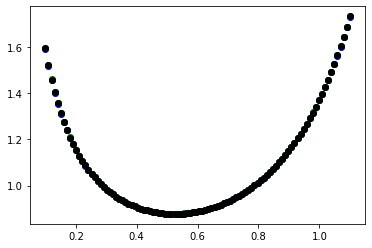

In [6]:
#Gráfica de los diferentes valores para cada derivada:

plt.scatter(x,derivate_progresive(x), color='b')
plt.scatter(x,derivate_central(x), color='g')
plt.scatter(x,derivate_analitic(x), color='k')

**f)** Grafique el error nodal para ambas aproximaciones.

Dicho error nodal estará dado por la diferencia entre el resultado de la derivada central o progresiva con la analítica

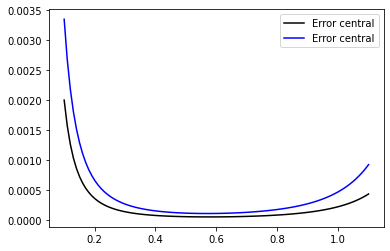

In [7]:
x = np.linspace(0.1,1.1,100)
error_progresive = np.zeros_like(x)
error_central = np.zeros_like(x)

for i in range(len(x)):
    error_progresive[i] = np.abs(derivate_progresive(x[i]) - derivate_analitic(x[i]))
    error_central[i] = np.abs(derivate_central(x[i]) - derivate_analitic(x[i]))
    
    
plt.plot(x,error_central, color='k',label='Error central')
plt.plot(x,error_progresive, color='b',label='Error central')
plt.legend()
plt.show()

> **3.10. Raíces de Polinomios:**

**5.** $\verb|(SymPy)|$ Calcular todas las raíces reales de los primeros 20 polinomios de Laguerre. La formula de Rodrigues es:

$$L_{n}(x) = \frac{e^{x}}{n!} \cdot \frac{d^{n}}{dx^{n}} [e^{-x} x^{n}].$$

El intervalo donde existen las raíces es $0 \leq x \leq \infty$.

> **Solución:**

La primera parte del código se centrará en el establecimiento de una función que genere los primeros 20 polinomios de Laguerre, a partir de los cuales se trabajará empleando el método de Newton-Rhapson para hallar las raíces de cada uno de dichos polinomios.

In [86]:
# Primera parte enfocada en encontrar los primeros 20 polinomios de Laguerre:

x = sym.symbols('x')

def LaguerrePolynomia(n):
    if n >= 0:
        semi_laguerre = (np.e**x)/np.math.factorial(n)
        main_laguerre = (np.e**(-x))*(x**n)

        if n >= 1:
            for i in range(1, n + 1):
                main_laguerre = sym.diff(main_laguerre, x)
        polynomia = sym.simplify(main_laguerre * semi_laguerre)
        return polynomia
    
    else:
        print("El valor de \"n\" digitado no es válido.")


Laguerre = np.array([])   

for i in range(0, 14):
    Laguerre = np.append(Laguerre, LaguerrePolynomia(i))

Ya con la primera parte del código, la parte final se enfocarán en establecer un método que genere las raíces reales de dichos polinomios. Nótese que no se considera el polinomio de Laguerre $L(0)$ ya que sus raíces reales no existen, al ser un polinomio de grado cero (una función constante).

In [87]:
# Segunda parte del código enfocada en la búsqueda de las raíces de los polinomios.

x_ = np.linspace(-0.1, 40, 500)

for i in range(1, len(Laguerre)):
    function = sym.lambdify([x], Laguerre[i], 'numpy')
    print("El polinomio de Laguerre de grado {} tiene las siguientes raíces: {}".format(i, FindingRoots(function, x_)))

El polinomio de Laguerre de grado 1 tiene las siguientes raíces: [1.]
El polinomio de Laguerre de grado 2 tiene las siguientes raíces: [0.58578644 3.41421356]
El polinomio de Laguerre de grado 3 tiene las siguientes raíces: [0.41577456 2.29428036 6.28994508]
El polinomio de Laguerre de grado 4 tiene las siguientes raíces: [0.32254769 1.7457611  4.5366203  9.39507091]
El polinomio de Laguerre de grado 5 tiene las siguientes raíces: [ 0.26356032  1.41340306  3.59642577  7.08581001 12.64080084]
El polinomio de Laguerre de grado 6 tiene las siguientes raíces: [ 0.2228466   1.1889321   2.99273633  5.77514357  9.83746742 15.98287398]
El polinomio de Laguerre de grado 7 tiene las siguientes raíces: [ 0.19304368  1.0266649   2.56787674  4.90035308  8.18215344 12.73418029
 19.39572786]
El polinomio de Laguerre de grado 8 tiene las siguientes raíces: [ 0.17027963  0.90370178  2.25108663  4.26670017  7.0459054  10.75851601
 15.74067864 22.86313174]
El polinomio de Laguerre de grado 9 tiene las si

> **3.13. Interpolación de Lagrange:**

**4.** $\verb|(Python)|$ En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones en metros respecto al arma homicida (tome $\vec{g} = −9.8$ $m/s^2 \cdot \hat{j}$):

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección. **Rpta: $V_{0} = 10 m/s$ y $\theta = 20^{\circ}$**. *Hint:* Encuentre el término lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala.

In [10]:
# Instancia de descarga del .csv para el análisis de los datos:

if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/Tiro_Parabolico.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [11]:
# Código principal:

main_data = pd.read_csv(Path_)

x_ = np.float64(main_data.X)
y_ = np.float64(main_data.Y)

def PartialPolynomia(x, xi, j):
    init_poly = 1.0
    iterations = len(xi)
    for i in range(iterations):
        if i != j:
            init_poly *= (x - xi[i])/(xi[j] - xi[i])
    return init_poly

def LagrangeInterpolation(x, xi, yi):
    combined_poly = 0
    iterations = len(xi)
    for i in range(iterations):
        combined_poly += yi[i]*PartialPolynomia(x, xi, i)
    return combined_poly

x = np.linspace(x_[0], x_[-1],100)
y = LagrangeInterpolation(x, x_, y_)


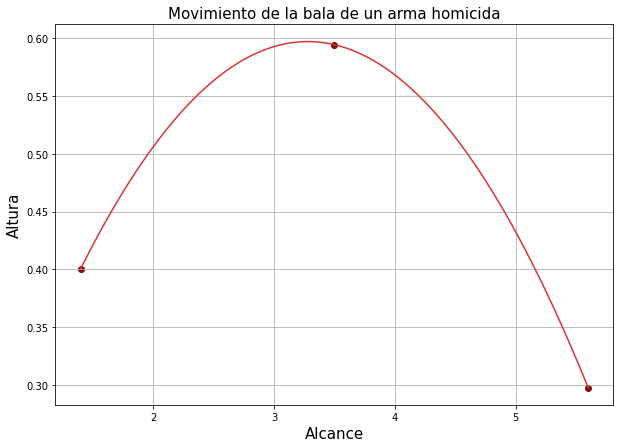

In [12]:
# A continuación se presenta el ploteo del movimiento de la bala en cuestión:

fig = plt.figure(figsize = (10,7))
plt.title('Movimiento de la bala de un arma homicida', fontsize = 15)
plt.xlabel(r'Alcance',fontsize = 15)
plt.ylabel(r'Altura',fontsize = 15)
plt.scatter(x_, y_, color = '#800F0F', marker = 'o')
plt.plot(x, y, color = '#DC3333')
plt.grid()


In [13]:
# En éste apartado se encuentran los coeficientes:

x = sym.Symbol('x', real = True)

formulae = LagrangeInterpolation(x, x_, y_)
formulae = sym.simplify(formulae)

main_expression = formulae.args[1]
diff_expression = sym.diff(main_expression, x)

main_expression = sym.lambdify([x], main_expression, 'numpy')
diff_expression = sym.lambdify([x], diff_expression, 'numpy')

linear_coefficient = main_expression(0)
cuadratic_coefficient = -diff_expression(0)

In [14]:
# Ahora se realizan los cálculos del ángulo y la velocidad:

angle = round(np.degrees(np.arctan(linear_coefficient)), 1)

velocity = round(np.sqrt((9.8)/(2*cuadratic_coefficient*(np.cos(np.radians(angle))**2))), 1)

print("El valor de la velocidad inicial de la vala es de {} m/s referida en un ángulo de {}° con respecto al eje de tiro.".format(velocity, angle))

El valor de la velocidad inicial de la vala es de 10.0 m/s referida en un ángulo de 20.0° con respecto al eje de tiro.


**5.** $\verb|(Python)|$ _Interpolación Newton-Gregory_: Para el siguiente conjunto de puntos:

Link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv

Encuentre el polinomio interpolante de menor grado usando el método Newton-Gregory.

In [15]:
# Instancia de descarga del .csv para el análisis de los datos:

if not path.exists('Data'):
    os.mkdir('Data')

file = 'Data/NewtonInterpolation.dat'
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv'

if not path.exists(file):
    Path_ = wget.download(url,file)
    
else:
    Path_ = file

In [16]:
# Código principal:

main_data = pd.read_csv(Path_)

x_ = np.float64(main_data.X)
y_ = np.float64(main_data.Y)

def NewtonGregory_Interpolation(x_,y_, x):
    # Establecimiento de la matriz con las diferencias de orden n:
    main_polynomia = y_[0]
    matrix = np.zeros((len(x_),len(x_)))
    matrix[:,0] = y_
    aux_poly = 1.0

    for i in range(1,len(x_)):
        aux_poly *= (x - x_[i-1])
        for j in range(i,len(x_)): 
            matrix[j,i] = (matrix[j,i-1] - matrix[j-1,i-1])/(x_[j] - x_[j - i]) # Como las particiones no son equi-distantes, es necesario aplicar el método general 
        main_polynomia += aux_poly*matrix[i,i]                                      # del algoritmo de interpolación de Newton-Gregory.

    return main_polynomia, matrix

x = np.linspace(x_[0], x_[-1],1000)
y = []

for i in range(len(x)):
    y.append(NewtonGregory_Interpolation(x_, y_, x[i])[0])

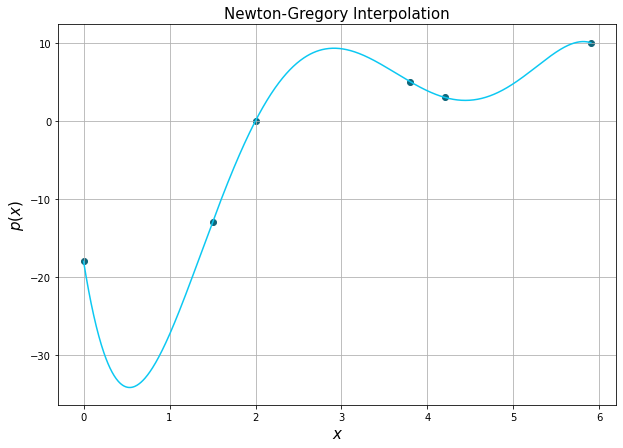

In [17]:
# Información general para el ploteo de la función:

fig = plt.figure(figsize = (10,7))
plt.title('Newton-Gregory Interpolation', fontsize = 15)
plt.xlabel(r'$x$',fontsize = 15)
plt.ylabel(r'$p(x)$',fontsize = 15)
plt.plot(x,y, color = '#0CC8F2')
plt.scatter(x_,y_, color = '#10667A',marker = 'o')
plt.grid()

x = sym.Symbol('x', real = True)
y, matrix = NewtonGregory_Interpolation(x_, y_, x)
y = sym.simplify(y)
matrix = sym.simplify(matrix)

In [18]:
y # Acá se puede apreciar al polinomio con el mínimo grado que contiene los puntos especificados:

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0

In [19]:
matrix  # Observando la matriz de diferenciales es posible notar que el mínimo grado es, ciertamente, 5.

[[-18.0, 0.0, 0.0, 0.0, 0.0, 0.0], [-13.0, 3.33333333333333, 0.0, 0.0, 0.0, 0.0], [0.0, 26.0, 11.3333333333333, 0.0, 0.0, 0.0], [5.0, 2.77777777777778, -10.0966183574879, -5.63946097126875, 0.0, 0.0], [3.0, -5.0, -3.53535353535353, 2.430098082272, 1.92132358417637, 0.0], [10.0, 4.11764705882353, 4.34173669467787, 2.01976672564908, -0.093257126505209, -0.34145435774264]]

> **3.14. Integración:**

**7)** **$\verb|(Python)|$** . Una forma de generalizar el método de integración del trapecio para una integral doble de una función $f(x, y)$ consiste en dividir el plano $xy$ en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio $R = 1$ como sigue:


* Cree una grilla entre $−R$ y $R$ en el plano $xy$, donde el número de cuadrados en cada lado de la grilla sea $n$. Es decir, la grilla tendría $n + 1$ puntos en cada eje, y $n^2$ cuadrados pequeños.

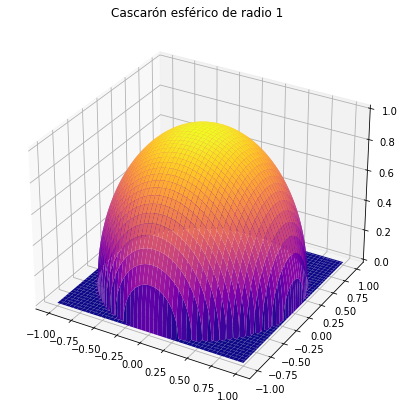

In [20]:
n = 500
x, h = np.linspace(-1, 1, n + 1, retstep = True )
y = np.linspace(-1, 1, n + 1)

def Semi_sphere(x, y, R = 1):
    power_z = R - (x**2 + y**2)
    if power_z < 0.:
        return 0.
    else:
        return np.sqrt(power_z)

Semi_sphere = np.vectorize(Semi_sphere)

X, Y = np.meshgrid(x, y)
Z = Semi_sphere(X, Y)

fig = plt.figure(figsize = (7, 7))
ax = fig.add_subplot(111, projection = '3d')
ax.set_title('Cascarón esférico de radio 1')
ax.plot_surface(X,Y,Z, cmap='plasma')

* Para cada cuadrado pequeño calcule el promedio de la función en los cuatro vértices y multiplique por el área del cuadrado pequeño. Si el punto queda fuera de la esfera asuma que el valor de la función $f(x, y)$ es cero.

In [21]:
volume = 0

for i in range(0, len(Z[:,0]) - 1):
    for j in range(0, len(Z[:,0]) - 1):
        average = (Z[i, j] + Z[i + 1, j] + Z[i, j + 1] + Z[i + 1, j + 1])
        volume += 0.25 * average * h**2

error = round(np.abs(volume - 2/3 * np.pi)/(2/3 * np.pi) * 100, 4)

print("El volumen del cascarón esférico, aplicando la aproximación desarrollada, es de aproximadamente {}, con una taza de error del {} con respecto al valor real.".format(round(volume, 4), error))


El volumen del cascarón esférico, aplicando la aproximación desarrollada, es de aproximadamente 2.0944, con una taza de error del 0.0008 con respecto al valor real.


**14)** $\verb|(Python)|$ Escribir el polinomio $p(x) = 3 + 5x + x^{2}$ en la base de Legendre. **Rpta:** $p(x) = \frac{10}{3}p_{0}(x) + 5p_{1}(x) + \frac{2}{3}p_{2}(x)$.

Para hallar la combinación lineal que da lugar al polinomio $p(x)$ en cuestión es necesario emplear un método usual en álgebra lineal, aplicando métodos de cálculo simbólico:

$$y = \sum_{i = 0}^{n} a_i \cdot v_{i}$$

donde $a_{i}$ puede ser visto como 

$$a_{i} = \frac{\langle y \; , \; v_{i} \rangle}{\lVert v_{i} \rVert^{2}}$$

Para ello, calcularemos los polinomios generados por la base de Legendre.

In [91]:
x = sym.Symbol('x',real=True)

#En esta parte se definirán los primeros 2 polinomios de Legendre.
p0 = 1
p1 = x
Legendre_polynomy = [p0,p1]

#En esta parte se calcularán los polinomios para los demás grados del polinomio dado.
for i in range(2,3):
    Legendre_basis = ((2*i-1)*(x*p1) - (i-1)*p0) / i
    Legendre_polynomy.append(Legendre_basis)
    p0 = p1
    p1 = Legendre_basis

Ahora bien, usando los polinomios de Legendre se escribirá el nuevo polinomio en base a estos usando la misma idea presentada al inicio del análisis con la adición de la integral que describiría los coeficientes de la matriz.

$$ \int_{a}^{b} p_l(x_i)\cdot L_i(x) dx $$

Donde $L_i(x)$ representa el polinomio de Legendre para el grado del polinomio.

In [93]:
#Código para escribir el polinomio propio en base de Legendre
polynomy = x**2 + 5*x +3
coefficient = np.zeros(3)

for i in range(0,3):
    Multiplication = polynomy * Legendre_polynomy[i]
    Integral = sym.integrate(Multiplication,(x, -1, 1))
    coefficient[i] = Integral*((2*i+1)/2)
    
print("El polinomio escrito en la base de Legendre es ({})p_0(x) + ({})p_1(x) + ({})p_2(x)".format(coefficient[0],coefficient[1],coefficient[2]) )

El polinomio escrito en la base de Legendre es (3.3333333333333335)p_0(x) + (5.0)p_1(x) + (0.6666666666666666)p_2(x)


Como podemos observar los coeficientes concuerdan con la respuesta dada por el ejercicio aunque dado por el entorno de Python fue imposible escribirlos de forma fraccionaria.

**17)** **$\verb|(Python)|$** In the black-body radiation problem the following integral appears:

$$\int_{0}^{\infty} \frac{x^3}{e^x - 1}\mathrm{d}x = \frac{\pi^4}{15}.$$

**(a)** Compute this integral using the Gauss-Laguerre quadrature method for $n = 3$ evaluation
points.

Para este caso, debemos hallar las raíces y pesos para la cuadratura Gauss-Laguerre implementando el método de Newton-Rhapson. En primer lugar, generaremos los polinomios de Laguerre de grado 3 y hallaremos sus respectivas raíces reales. Dado este resultado podemos hallar los pesos de la cuadratura dados por la ecuación,

$$w_k = \frac{x_k}{(n + 1)^2 \cdot [L_{n + 1}(x_{k})]^2}$$

Donde $x_i$ son las raíces del polinomio de grado n de Laguerre. Con esto, la integral se podría aproximar a partir de la siguiente expresión,

$$ \int_{0}^{∞} f(x)e^{-x} = \sum_{i=1}^{n} w_if(x_i)$$

Sin embargo, nótese que la función evaluada por la integral debe estar acompañada de la expresión $e^{-x}$. Por ello, modificaremos la función dada para que cumpla con dicha condición. Sea $a$ la expresión a la que queremos llegar,

$$ \frac{x^3}{e^x - 1} = ae^{-x} \rightarrow a = \frac{x^3e^x}{e^x - 1}$$

Esta será la función sobre la que realizaremos la cuadratura.

In [ ]:
# X dada para simbolos:
x_ = sym.symbols('x')

# X dada para valores:
x = np.linspace(-0.1, 40, 500)

# Definimos la función que obtendrá los polinomios de Laguerre:
def LaguerrePolynomia(n):
    if n >= 0:
        semi_laguerre = (np.e**x_)/np.math.factorial(n)
        main_laguerre = (np.e**(-x_))*(x_**n)

        if n >= 1:
            for i in range(1, n + 1):
                main_laguerre = sym.diff(main_laguerre, x_)
        polynomia = sym.simplify(main_laguerre * semi_laguerre)
        return polynomia
    
    else:
        print("El valor de \"n\" digitado no es válido.")
    
# Se define la función bajo la forma exigida de la cuadratura 
def General(x):
    return ((x**3)*(np.exp(x))) / (np.exp(x) - 1)

# Definimos la función que generará dicha integral para cualquier grado:
def LaguerreIntegral(n):
    function = sym.lambdify([x_], LaguerrePolynomia(n), 'numpy') 
    
    #Raíces del polinomio de grado n de Laguerre:
    x_i = FindingRoots(function, x)
    
    w = np.array([])
    for k in range(n):
        L_i = sym.lambdify([x_], LaguerrePolynomia(n+1), 'numpy')
        
        # Pesos de la cuadratura Gauss-Laguerre para el polinomio de grado n:
        w_i = (x_i[k]) / ( ((n+1)**2) * ((L_i(x_i[k]))**2) )
        w = np.append(w,w_i)
        
    Integral = np.sum(w*General(x_i))
    
    return Integral

In [ ]:
print("El resultado de la integral para el polinomio de grado 3 es: {}".format(LaguerreIntegral(3)))

**(b)** For this estimation, plot the relative error $(\varepsilon_{r}(n) = I_{estimated}(n)/I_{exact})$ as a function of the evaluation points, with $n = [2, 3, ..., 10]$.

_Hint:_ For the Gauss-Laguerre method, the weights are given by:

$$w_k = \frac{x_k}{(n + 1)^2 \cdot [L_{n + 1}(x_{k})]^2}$$

In [ ]:
# En esta parte se definirá la función del error relativo:
def Laguerre_error(n):
  Integral_value = ((np.pi)**4 ) / 15
  return LaguerreIntegral(n)/ Integral_value

error_relative = np.array([])
for k in range(2,11):
    error = round(Laguerre_error(k),3)
    error_relative = np.append(error_relative,error)
    print("El error relatiivo para el polinomio de grado {} es de {}".format(k,error))

In [ ]:
n_values = [2,3,4,5,6,7,8,9,10]
plt.title('Relative error', fontsize = 15)
plt.xlabel(r'$n$',fontsize = 15)
plt.ylabel(r'$\varepsilon_{r}(n)$',fontsize = 15)
plt.scatter(n_values,error_relative, color = '#0CC8F2',marker = 'o',label='Quadrature accuracy')
plt.legend()
plt.grid()

**18)** **$\verb|(Python)|$** La cuadratura de Gauss-Hermite está definida para integrales de la forma:

$$I = \int_{- \infty}^{\infty}{f(x) \cdot e^{-x^{2}}dx}$$

que tiene la siguiente representación en cuadraturas:

$$I \approx \sum_{i = 1}^{N} \omega_{i} \cdot f(x_{i})$$

donde los puntos $x_{i}$ son las raíces de los polinomios de Hermite $H_{n}(x)$ dados por la formula de Rodrigues:

$$H_{n}(\xi) = (-1)^{n} \cdot e^{\xi^{2}} \cdot \frac{d^{n}}{d\xi^{n}} e^{-\xi^{2}}.$$

La formula de Gauss-Hermite está dada por:

$$\omega_{i} = \frac{2^{n - 1} \cdot n! \cdot \sqrt{\pi}}{n^{2} \cdot H_{n - 1}(r_{i})^{2}}$$

**(a)** Encontrar los primeros 20 ceros de los polinomios y los correspondientes pesos de la
cuadratura.

In [95]:
# Primera parte del código enfocada a la creación de los polinomios.

x = sym.Symbol('x', real = True)

def GaussHermiteQuad(i):
    polynomia = (-1)**i * np.e**((x)**2)
    gauss_hermite = np.e**(-(x)**2)
    if i >= 0:
        for j in range(0, i):
            gauss_hermite = sym.diff(gauss_hermite, x)
        polynomia *= gauss_hermite
    polynomia = sym.simplify(polynomia)
    return polynomia

GaussHermite = np.array([])   

for i in range(0, 14):
    GaussHermite = np.append(GaussHermite, GaussHermiteQuad(i))


In [96]:
# Segunda parte enfocada en la búsqueda de los ceros y los pesos:

# CEROS:
x_ = np.linspace(-50, 50, 500)
Hermite_roots = [[None]]

for i in range(1, len(GaussHermite)):
    function = sym.lambdify([x], GaussHermite[i], 'numpy')
    if i == 1:
        roots = np.array([0.])
    else:
        roots = FindingRoots(function, x_)
    Hermite_roots.append(roots)
    print("El polinomio de Gauss-Hermite de grado {} tiene las siguientes raíces: {}".format(i, roots))

# PESOS DE LA CUADRATURA:

def FindingWeights(Hermite, Roots):
    """Empleando la lista de los polinomio de Hermite, junto con las raíces, procedemos a
    generar el cálculo de los pesos de la cuadratura.
    """
    weights = [[None]]
    for i in range(1, len(Hermite)):
        PreHermite = sym.lambdify([x], Hermite[i - 1])
        roots = Roots[i]
        pesos = []
        for j in roots:
            weight_j = (2**(i - 1) * np.math.factorial(i) * np.sqrt(np.pi))/((i)**2 * PreHermite(j)**2)
            pesos.append(weight_j)
        weights.append(pesos)
    return weights

Weights = FindingWeights(GaussHermite, Hermite_roots)

print('\n')

for i in range(len(Weights)):
    print("Los pesos de la cuadratura de Gauss-Hermite de grado {} son: {}".format(i + 1, Weights[i]))

El polinomio de Gauss-Hermite de grado 1 tiene las siguientes raíces: [0.]
El polinomio de Gauss-Hermite de grado 2 tiene las siguientes raíces: [-0.70710678  0.70710678]
El polinomio de Gauss-Hermite de grado 3 tiene las siguientes raíces: [-1.22474487  0.          1.22474487]
El polinomio de Gauss-Hermite de grado 4 tiene las siguientes raíces: [-1.65068012 -0.52464762  0.52464762  1.65068012]
El polinomio de Gauss-Hermite de grado 5 tiene las siguientes raíces: [-2.02018287 -0.95857246 -0.          0.95857246  2.02018287]
El polinomio de Gauss-Hermite de grado 6 tiene las siguientes raíces: [-2.35060497 -1.33584907 -0.43607741  0.43607741  1.33584907  2.35060497]
El polinomio de Gauss-Hermite de grado 7 tiene las siguientes raíces: [-2.65196136 -1.67355163 -0.81628788  0.          0.81628788  1.67355163
  2.65196136]
El polinomio de Gauss-Hermite de grado 8 tiene las siguientes raíces: [-2.93063742 -1.98165676 -1.15719371 -0.38118699  0.38118699  1.15719371
  1.98165676  2.93063742]

**(b)** El estado de un oscilador armónico en mecánica cuántica está dado por la funciones de probabilidad:

$$\phi_{n}(\xi) = \frac{1}{\sqrt{2^{n} \cdot n!}} \cdot \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \cdot e^{-\xi^{2}/2} \cdot H_{n}(\xi)$$

donde $\xi = \frac{\sqrt{m\omega}}{\hbar} \cdot x$. Haga $\frac{\sqrt{m\omega}}{\hbar} = 1$, es decir, $\xi = x$ para la aplicación numérica. Estime numéricamente el valor cuadrático medio de la posición de la particula en el primer estado exitado $(n = 1)$. El valor exacto de la integral está dado por:

$$\langle x^{2} \rangle = \int_{- \infty}^{\infty} |\phi_{1}(x)|^{2} \cdot x^{2} dx = \frac{3}{2}.$$

El polinomio de Hermite de primer orden está dado por:

$$H_{1}(x) = 2x.$$

**Solución:**

Dado que nos interesa calcular el valor de la integral para conocer el valor cuadrático medio de la posición de una particula, debemos de escribir la expresión de nuestro interés:

$$\frac{\sqrt{m\omega}}{\hbar} = 1, \quad \xi = x \quad \Rightarrow \quad \phi_{n}(x) = \frac{1}{\sqrt{2^{n} \cdot n!}} \cdot \left(\frac{1}{\pi}\right)^{1/4} \cdot e^{-x^{2}/2} \cdot H_{n}(x)$$

Lo que nos lleva a establecer, para $n = 1$:

$$\phi_{1}(x) = \frac{1}{\sqrt{2\sqrt{\pi}}} \cdot e^{-x^{2}/2} \cdot 2x$$

Dejándonos con la siguiente integral:

$$\langle x^{2} \rangle = \int_{- \infty}^{\infty} \left|\frac{1}{\sqrt{2\sqrt{\pi}}} \cdot e^{-x^{2}/2} \cdot 2x\right|^{2} x^2 dx = \int_{- \infty}^{\infty} \frac{1}{2\sqrt{\pi}} \cdot 4x^4 \cdot e^{-x^{2}} dx$$

In [97]:
def ArmonicOscilator(x):
    expression = 1/(2*np.sqrt(np.pi)) * 4*(x**4)
    return expression

Integral = []

for i in range(1, len(Weights)):
    sum = 0
    for j in range(0, len(Hermite_roots[i])):
        sum += Weights[i][j] * ArmonicOscilator(Hermite_roots[i][j])
    Integral.append(sum)

print("El valor más preciso obtenido para la integral del problema fue de {}.".format(Integral[-1]))


El valor más preciso obtenido para la integral del problema fue de 1.4999999971532283.


**(19) Superconductividad: BSC (Bardeen,Schrieffer,Cooper) Temperatura crítica.**

En este modelo de superconductividad a temperaturas cerca del cero absoluto, surge una ecuacin denominada la ecuación de banda prohibida.

$$\frac{1}{N_{0} V} = \frac{1}{2} \int_{-\hbar\omega_{D}}^{\hbar\omega_{D}} \frac{\tanh(\sqrt{\epsilon_{k}^{2} + \Delta(T)^2} \cdot 1/2k_{B} T)}{\sqrt{\epsilon_{k}^{2} + \Delta(T)^2}} d\epsilon_{k}$$

donde las constantes definen un sistema termodinámico a nivel cuántico y $\Delta(T)$ define el valor de la banda prohibida.(Note que la función no tiene anti-derivada y requiere un procedimiento completamente numérico). Definamos la temperatura de Debye como $T_D = \frac{\hbar\omega_{D}}{k_B} = 300 K$ y $N_{0}V = 0.3$. Por inspección, la integral toma la forma:

$$\frac{1}{N_{0} V} = \frac{1}{2} \int_{-1}^{1} \frac{\tanh(\sqrt{x^{2} + \Delta'(T)^2} \cdot T_{D}/2T)}{\sqrt{x^{2} + \Delta'(T)^2}} dx$$

 Note que $\Delta'(T) = \hbar\omega_{D}\Delta T$ (banda prohibida primada). Existe una temperatura a la cuál la banda prohibida tiende a cero $\Delta T \to 0$, dicha temperatura es la temperatura crítica $T_c$ donde el material se convierte en superconductor. Para estimar $T_c$ de este material les propongo la siguiente estrategia:

**(a)** Implemente la función a integrar en **Python**. Esta función debe tener la temperatura $T$ y el tamaño de la banda prohibida $\Delta'(T)$ como parámetros.

In [98]:
def ForbiddenBand(x, T, deltaT):
    Above = np.tanh(np.sqrt(x**2 + deltaT**2) * 300/(2*T))
    Below = np.sqrt(x**2 + deltaT**2)
    return 0.5 * (Above/Below)

**(b)** Cargar los puntos y los pesos de la cuadratura de Gauss-Legendre a orden $n = 50$.

In [99]:
x, wi = np.polynomial.legendre.leggauss(50)

**(c)** Debe variar la temperatura del material entre $1$ a $20$ en pasos de $dT = 1 × 10^{-4}$
y hacer el cálculo de la integral. La temperatura crítica será justamente cuando la integral sea aproximadamente igual a:

$$\frac{1}{N_{0} V} \approx Integral(T = T_{c}, \Delta'(T_{c}) = 0)$$

En ese sentido deberá usar algún criterio de parada del algoritmo. Por ejemplo: $\verb|if np.abs(I-1/(N0V)) < dT: return Tc|$. La temperatura crítica es: $T_c \approx 12.1331 K$.
 

In [100]:
T, dT = np.linspace(1, 20, 190000, retstep = True)

def LookingForTc(roots, weights, T, dT):
    for temperature in T:
        Integral = np.sum(weights*ForbiddenBand(roots, temperature, dT))
        if np.abs((Integral - 1./0.3)) < dT:
            return temperature

CriticTemperature = round(LookingForTc(x, wi, T, dT), 5)

print("La temperatura crítica estimada es de aproximadamente {} K.".format(CriticTemperature))

La temperatura crítica estimada es de aproximadamente 12.13356 K.
